In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pickle

In [2]:
id_df = pd.read_excel('sps/alns/func_sps_matches.xls')
class_df = pd.read_csv('../outputs/any_functionality_classification.csv')

In [3]:
id_seqs = list(set(id_df['seq'].values))
func_seqs = list(set(class_df['seq'].values))

In [4]:
err = 0
for s in func_seqs:
    if s not in id_seqs:
        print(s)
        err += 1
for s in id_seqs:
    if s not in func_seqs:
        print(s)
        err += 1
assert err == 0, 'check sequences'

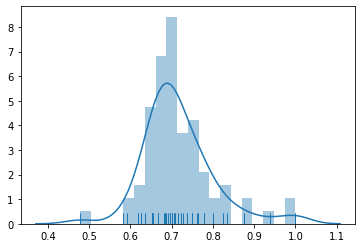

In [5]:
sns.distplot(id_df['percent_identity'].values, bins=20, rug=True)

In [6]:
# df['seq']

In [7]:
class_df

,Unnamed: 0,spid,seq,any_functional
0,0,sps10-2,MKVFTLAFAIICQLFASA,True
1,1,sps12-1,MGFRLKALLVGCLIFLAVSSAIA,True
2,2,sps12-2,MTSYEFLLVILGVLLSGA,True
3,3,sps12-4,MNIRLGALLAGLLLSAMASAVFA,True
4,4,sps13-3,MNKKFKTIMALAIATLSAAGVGVAHA,True
...,...,...,...,...
68,68,sps40-4,MKLLKVIATAFLGLTSFASA,False
69,69,sps5-1,MLLPAFMLLILPAALA,False
70,70,sps9-1,MLSLKSLFLSTLLIVLAASGFA,False
71,71,sps9-3,MKLLAFIFALFLFSIARA,False


In [8]:
nonfunctional_sps = class_df[class_df['any_functional']==False]['seq'].values

nonfunc = id_df[id_df['seq'].isin(nonfunctional_sps)]
func = id_df[~id_df['seq'].isin(nonfunctional_sps)]
nonfunc['class'] = 'nonfunctional'
func['class'] = 'functional'
plot_df = nonfunc.copy()
plot_df = plot_df.append(func, ignore_index=True)

<ipython-input-8-7d4b3da4b3e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonfunc['class'] = 'nonfunctional'
<ipython-input-8-7d4b3da4b3e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  func['class'] = 'functional'


In [9]:
nonfunc.drop_duplicates()
seqs = list(set(nonfunc['seq'].values))
seqs.sort()
# for i, s in enumerate(seqs):
#     print(i,s)

In [10]:
import seaborn as sns

In [11]:
# nonfunctional_sps

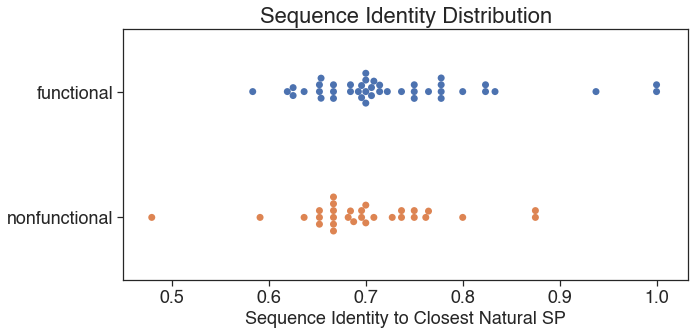

In [12]:
sns.set(font='helvetica', context='notebook', font_scale=1.5, style='ticks')
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='both', which='major', labelsize=18)
sns.swarmplot(x = 'percent_identity', y='class', order=['functional','nonfunctional'], data=plot_df, size=7) # df['percent_identity'].values)

plt.xlabel('Sequence Identity to Closest Natural SP', fontsize=18)
plt.ylabel('', fontsize=18)
plt.title('Sequence Identity Distribution', fontsize=22)
plt.tight_layout()
# sns.swarmplot(nonfunc['percent_identity'].values, color='red')
fig.savefig("swarm.svg")

In [13]:
from scipy.stats import ttest_ind

p = ttest_ind(nonfunc['percent_identity'].values, func['percent_identity'].values, equal_var=True).pvalue
p

0.16777204227514797

In [14]:
len(func)

43

In [15]:
len(nonfunc)

30

In [16]:
# t = list(set(func['seq'].values))
# t.sort()
# for i in t:
#     print(i)